# Modelos




### 1- Librerías utilizadas


In [ ]:
#Importamos las librerías
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Concatenate
from sklearn.preprocessing import  MinMaxScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
import math
import imageio as io
from numpy import moveaxis
from PIL import Image
import cv2
import os
import gc
import platform
import concurrent
from tqdm import tqdm
from sklearn.svm import SVC
import pickle as pickle
import psycopg2
import joblib
from sqlalchemy import create_engine

plt.style.use('ggplot')


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
!curl ipecho.net/plain


34.134.49.160

In [ ]:
# Lee la configuración a partir de archivo
def get_db_config():
  return {'database': 'play_store_wharehouse',
          'host': '34.88.251.82',
          'password': 'rO7I^nxH*0hi',
          'port': 5432,
          'user': 'postgres'}

def connect_to_database(database, user, password, host, port):
  conn_string = 'postgresql://{}:{}@{}/{}'.format(
      user, 
      password, 
      host, 
      database)
  db = create_engine(conn_string)
  conn_alchemy = db.connect()
  return conn_alchemy

# Images pickle to numpy
def format_images(df):
    df.loc[:, 'image_icon'] = df.loc[:, 'image_icon'].apply(lambda x: np.array(pickle.loads(x)))
    df.loc[:, 'image_header'] = df.loc[:, 'image_header'].apply(lambda x: np.array(pickle.loads(x)))
    return df

# Conecto a la base de datos
conn_alchemy = connect_to_database(**get_db_config())

# Descargo las tablas data_mart e imágenes
df = pd.read_sql("SELECT * FROM data_mart", conn_alchemy, index_col='id_app_list')
# df_images = pd.read_sql("SELECT * FROM extracted_images_app", conn_alchemy, index_col='id_app_list', chunksize = 100)

conn = conn_alchemy.connect().execution_options(stream_results=True)
df = pd.read_sql("SELECT * FROM data_mart", conn_alchemy, index_col='id_app_list')

df.head().T

id_app_list                  NaN      NaN                  202981.0  \
id                                 26       27                  830   
title                             NaN      NaN                  4.0   
content_rating                    NaN      NaN             3.739264   
months_since_released             NaN      NaN                 11.0   
in_app_product_price              NaN      NaN             2.386532   
n_screenshots                     NaN      NaN                 12.0   
dif_histogram                     NaN      NaN               4294.0   
size_app                          NaN      NaN                 56.0   
description                       NaN      NaN                484.0   
ratings                           NaN      NaN               1460.0   
genre_id                          NaN      NaN             2.875893   
min_installs                      NaN      NaN             5.000004   
score                             NaN      NaN             4.471154   
date_release                      NaN      NaN             9.209075   
video                             NaN      NaN                  0.0   
developer_id                      NaN      NaN             5.349488   
days_since_released               NaN      NaN                362.0   
android_version                   NaN      NaN               2.7329   
reviews                           NaN      NaN              0.60206   
summary                           NaN      NaN                 11.0   
ever_updated                      NaN      NaN                  1.0   
id_app                           None     None  com.gungames.inshot   
released_year                     NaN      NaN               2021.0   
released_month                    NaN      NaN                  4.0   
released_day                      NaN      NaN                 14.0   
mean_min_installs_competency      NaN      NaN             7.380573   
mean_score_competency             NaN      NaN             4.370134   
mean_reviews_competency           NaN      NaN             3.406472   
rate_thumbsupcount_by_review      NaN      NaN             7.547945   
rate_reply_by_reviews             NaN      NaN             0.068493   
mean_score_comment                NaN      NaN             4.356164   
permission                        NaN      NaN             0.008546   
temp                              NaN      NaN             0.192465   
install_label                       2        2                    1   

id_app_list                         260878.0        15472.0   
id                                      3201            3305  
title                                    3.0             5.0  
content_rating                      3.719773        2.621616  
months_since_released                   23.0            18.0  
in_app_product_price                2.386532        4.523227  
n_screenshots                            4.0            24.0  
dif_histogram                        -2232.0        690024.0  
size_app                                34.0            91.0  
description                             15.0           239.0  
ratings                               2001.0        321823.0  
genre_id                            2.515151        3.083315  
min_installs                        5.698971             7.0  
score                               2.442623        4.071429  
date_release                        9.200576        9.204717  
video                                    0.0             1.0  
developer_id                        5.698971         6.02423  
days_since_released                    725.0           549.0  
android_version                     2.563781        3.218902  
reviews                             1.633468        3.189771  
summary                                 15.0            12.0  
ever_updated                             1.0             1.0  
id_app                        com.pop.win.gp  com.my.defense  
released_year                         2020.0          2020.0  
re

In [ ]:
def scale_data(x_train, x_test, scaler):
  """
  Standard Scale test and train data
  """
  scaler = scaler
  x_train_scaled = pd.DataFrame(
      scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

df = df.iloc[2:]

df.drop(['min_installs', 'id_app', 'id', 'months_since_released'], axis = 1, inplace = True)

data_0 = df[df['install_label']==0]
data_1 = df[df['install_label']==1]
data_2 = df[df['install_label']==2]

if data_0.shape[0] <= data_1.shape[0] and data_0.shape[0] <= data_2.shape[0]:
  data_1 = data_1.sample(data_0.shape[0], random_state=42)
  data_2 = data_2.sample(data_0.shape[0] ,random_state=42)
  df = pd.concat([data_0, data_1, data_2], axis=0)
elif data_1.shape[0] <= data_0.shape[0] and data_1.shape[0] <= data_2.shape[0]:
  data_0 = data_0.sample(data_1.shape[0], random_state=42)
  data_2 = data_2.sample(data_1.shape[0] ,random_state=42)
  df = pd.concat([data_0, data_1, data_2], axis=0)
else:
  data_1 = data_1.sample(data_2.shape[0], random_state=42)
  data_0 = data_0.sample(data_2.shape[0] ,random_state=42)
  df = pd.concat([data_0, data_1, data_2], axis=0)

X = df[df.columns.drop('install_label')]
y = df[['install_label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, shuffle = True, stratify=y)

X_train, X_test = scale_data(X_train, X_test, MinMaxScaler())

X_train = X_train.values
X_test=X_test.values

y_train = y_train.values
y_test = y_test.values

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 2- Modelo Deep Learning con TensorFlow

In [ ]:
def model_tuning_hyper(X_train, X_test, y_train, y_test):

  def create_mlp(inputs_shape, activation):
      inputs = Input(shape=inputs_shape)
      model = Dense(256, activation=activation)(inputs)
      model = Dense(512, activation=activation)(model)
      model = BatchNormalization()(model)
      model = Dropout(0.1)(model)
      model = Dense(256, activation=activation)(model)
      model = Dense(128, activation=activation)(model)
      model = BatchNormalization()(model)
      model = Dropout(0.1)(model)
      model = Dense(64, activation=activation)(model)
      model = Dense(32, activation=activation)(model)
      model = BatchNormalization()(model)
      model = Dropout(0.1)(model)
      model = Dense(16, activation=activation)(model)
      model = Dense(8, activation=activation)(model)
      model = Dense(3, activation='softmax')(model)


      model = Model(inputs = inputs, outputs = model)

      return model


  activation = LeakyReLU(alpha=0.3)
  
    
  #Dividimos entre train y test
  X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size = 0.2, random_state=42, shuffle = True, stratify=y_train)


  inputs_mlp = X_train[0].shape
  callback = EarlyStopping(monitor='val_loss', patience=10)


  # Creamos el modelo y realizamos un bucle para tunear los hiperparametros
  

  learnings_rates = [0.000001, 0.000005, 0.000025]
  batch_sizes = [10, 14, 16]
  epochs = [75, 100, 125, 150, 175]
  model_final = None
  history_final = None
  evaluate_final = None

  for learning in learnings_rates:
      for batch_size in batch_sizes:
        for epoch in epochs:
          model= create_mlp(inputs_mlp, activation)
          model.compile(loss ='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=learning), metrics = ['accuracy'], jit_compile=True)
          history = model.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), epochs=epoch, batch_size=batch_size, callbacks=[callback], verbose = 0)
          evaluate = model.evaluate(x = X_test, y = y_test, verbose = 0)
          print('Test loss:', evaluate[0],
                'Test acurracy:', evaluate[1],
                'Learning rate:', learning,
                'Batch_size:',batch_size,
                'Epochs:',epoch)
          plt.plot(history.history['accuracy'])
          plt.plot(history.history['val_accuracy'])
          plt.title('model accuracy')
          plt.ylabel('accuracy')
          plt.xlabel('epoch')
          plt.legend(['train', 'val'], loc='upper left')
          plt.show()

          plt.plot(history.history['loss'])
          plt.plot(history.history['val_loss'])
          plt.title('model loss')
          plt.ylabel('loss')
          plt.xlabel('epoch')
          plt.legend(['train', 'val'], loc='upper left')
          plt.show()
          if model_final == None or (evaluate[0]<evaluate_final[0]and evaluate[1]>=evaluate_final[1]):
            model_final = model
            evaluate_final = evaluate
            history_final = history

                    
  return model_final, history, evaluate_final

In [ ]:
with tf.device('/gpu:0'):
  model_final, history_final, evaluate_final = model_tuning_hyper(X_train, X_test, y_train, y_test)

print('Test loss:', evaluate_final[0], 'Test acurracy:', evaluate_final[1])

Output hidden; open in https://colab.research.google.com to view.

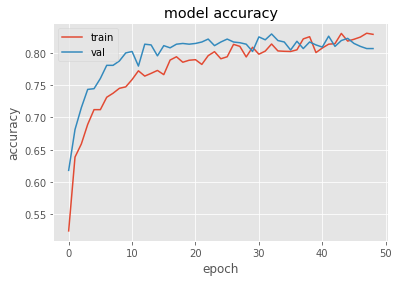

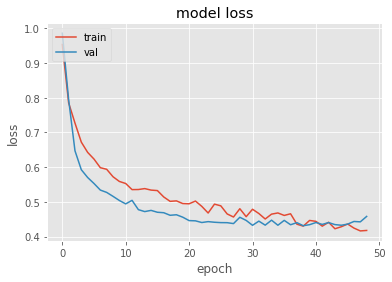

In [ ]:
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

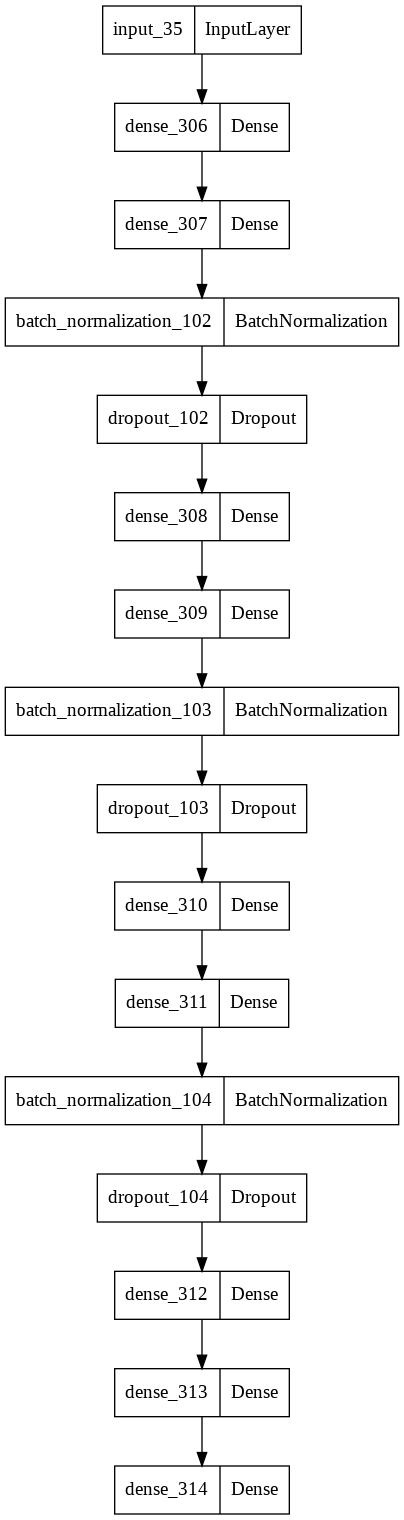

In [ ]:
plot_model(model_final)

In [ ]:
model_final.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 29)]              0         
                                                                 
 dense_306 (Dense)           (None, 256)               7680      
                                                                 
 dense_307 (Dense)           (None, 512)               131584    
                                                                 
 batch_normalization_102 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dropout_102 (Dropout)       (None, 512)               0         
                                                                 
 dense_308 (Dense)           (None, 256)               131328    
                                                          

In [ ]:
model_final.save('./Archivos/model_final.h5') 

## 3- Entrenamiento RandomForest

In [ ]:
def main_RandomForestClasiffiers(X_train, y_train):
    
    X_train, X_val, y_train, y_val =train_test_split(X_train, y_train,test_size = 0.2, random_state=42, shuffle = True, stratify=y_train)

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt', 'log2']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [2, 4]
    # Method of selecting samples for training each tree
    criterion = ['gini', 'entropy']


    parameter_space = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

    rf = RandomForestClassifier()
    rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3)
    rf.fit(X_train, y_train.ravel())

    # Best paramete set
    print('Best parameters found:\n', rf.best_params_)

    y_true, y_pred = y_val.ravel() , rf.predict(X_val)

    from sklearn.metrics import classification_report
    print('Results on the test set:')
    print(classification_report(y_true, y_pred))

    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]

    matrix = confusion_matrix(y_true, y_pred, labels=[0,1,2])
    class_names = ['Sin exito', 'Normal', 'Exitosas']

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(rf,
                                      X_val,
                                      y_val.ravel(),
                                      display_labels=class_names,
                                      cmap=plt.cm.Blues,
                                      normalize=normalize
                                     )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

    return rf, rf.best_params_

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 43, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 466}
Results on the test set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       295
           1       0.84      0.92      0.88       295
           2       0.95      0.91      0.93       295

    accuracy                           0.91       885
   macro avg       0.92      0.91      0.92       885
weighted avg       0.92      0.91      0.92       885

Confusion matrix, without normalization
[[270  25   0]
 [  9 272  14]
 [  0  28 267]]
Normalized confusion matrix
[[0.91525424 0.08474576 0.        ]
 [0.03050847 0.9220339  0.04745763]
 [0.         0.09491525 0.90508475]]


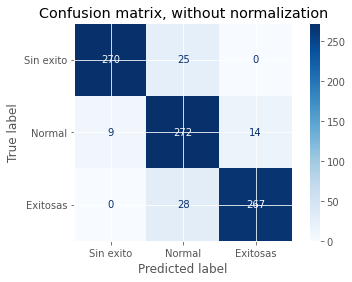

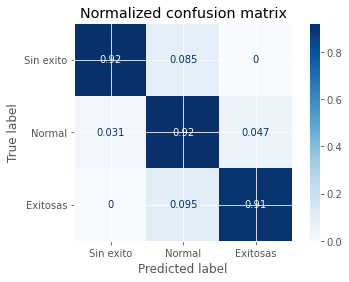

In [ ]:
rf_final, params_rf = main_RandomForestClasiffiers(X_train, y_train)

Results on the test set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       492
           1       0.87      0.91      0.89       492
           2       0.97      0.90      0.93       492

    accuracy                           0.92      1476
   macro avg       0.93      0.92      0.92      1476
weighted avg       0.93      0.92      0.92      1476

Confusion matrix, without normalization
[[470  22   0]
 [ 27 449  16]
 [  1  46 445]]
Normalized confusion matrix
[[0.95528455 0.04471545 0.        ]
 [0.05487805 0.91260163 0.03252033]
 [0.00203252 0.09349593 0.90447154]]


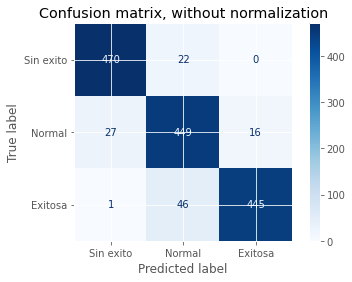

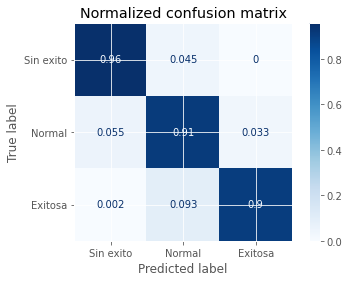

In [ ]:
y_true, y_pred = y_test.ravel() , rf_final.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

matrix = confusion_matrix(y_true, y_pred, labels=[0,1,2])
class_names = ['Sin exito', 'Normal', 'Exitosa']

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(rf_final,
                                  X_test,
                                  y_test.ravel(),
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize=normalize
                                  )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
joblib.dump(rf_final, './Archivos/rf_final.pkl')

['/content/drive/MyDrive/Archivos_proyecto/rf_final.pkl']